In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geologist/dataset_geologist.xlsx


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Data intro

In [4]:
path = '/kaggle/input/geologist/dataset_geologist.xlsx'
data = pd.read_excel(path, index_col='Unnamed: 0')

In [5]:
new_col_names = ['_'.join(s.split()[1:]) for s in data.columns]
new_col_names[0] = 'num'

In [6]:
data.columns = new_col_names

In [7]:
data.head()

,num,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Latitude,Longitude,Operator_company,...,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,6,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,26.0800,49.8100,SAUDI ARAMCO,...,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
1,10,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,...,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
2,11,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH,9843,NEOGENE,THINLY-BEDDED SANDSTONE,115.0,66.0,22.0,200.0
3,12,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
4,20,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,21.9607,56.0452,PDO,...,OIL,REJUVENATING,SALT,4955,CRETACEOUS,LIMESTONE,250.0,100.0,21.0,60.0


In [8]:
data.shape

(514, 21)

In [9]:
data.dtypes

num                                 int64
Field_name                         object
Reservoir_unit                     object
Country                            object
Region                             object
Basin_name                         object
Tectonic_regime                    object
Latitude                          float64
Longitude                         float64
Operator_company                   object
Onshore_or_offshore                object
Hydrocarbon_type_(main)            object
Reservoir_status_(current)         object
Structural_setting                 object
Depth_(top_reservoir_ft_TVD)        int64
Reservoir_period                   object
Lithology_(main)                   object
Thickness_(gross_average_ft)      float64
Thickness_(net_pay_average_ft)    float64
Porosity_(matrix_average_%)       float64
Permeability_(air_average_mD)     float64
dtype: object

In [10]:
data.isna().sum()

num                                0
Field_name                         0
Reservoir_unit                     0
Country                            0
Region                             0
Basin_name                         0
Tectonic_regime                   72
Latitude                           0
Longitude                          0
Operator_company                   0
Onshore_or_offshore                0
Hydrocarbon_type_(main)            0
Reservoir_status_(current)         0
Structural_setting                 0
Depth_(top_reservoir_ft_TVD)       0
Reservoir_period                   0
Lithology_(main)                   0
Thickness_(gross_average_ft)       0
Thickness_(net_pay_average_ft)     0
Porosity_(matrix_average_%)       72
Permeability_(air_average_mD)      0
dtype: int64

In [11]:
df = data.copy()

In [12]:
df.drop('num', inplace=True, axis=1)
df.dropna(inplace=True)

**targets: Tectonic_regime, Porosity_(matrix_average_%)**

## Numerical columns

In [13]:
num_cols = data.select_dtypes(exclude='object')
num_cols.shape

(514, 8)

In [14]:
num_cols.describe()

,num,Latitude,Longitude,Depth_(top_reservoir_ft_TVD),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,442.000000,514.000000
mean,537.642023,35.095555,-8.997048,6707.280156,783.678988,190.771751,17.929955,464.760239
std,314.239936,22.121078,88.163502,3613.719746,1424.953719,271.926665,7.554253,1001.308403
min,6.000000,-38.522100,-151.615300,220.000000,11.000000,0.000000,1.100000,0.001000
25%,263.250000,28.124825,-102.403650,3909.750000,140.000000,43.250000,12.000000,10.000000
50%,529.000000,37.810400,2.212100,6393.500000,328.000000,101.000000,17.900000,83.000000
75%,812.750000,51.285650,57.318375,9116.250000,753.750000,225.000000,24.000000,400.000000
max,1071.000000,76.446200,150.210000,19888.000000,12500.000000,2976.000000,55.000000,7500.000000


## Categorical columns

In [15]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head()

,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Operator_company,Onshore_or_offshore,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Reservoir_period,Lithology_(main)
0,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,JURASSIC,LIMESTONE
1,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,GUPCO,ONSHORE,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,CRETACEOUS,SANDSTONE
2,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,NEOGENE,THINLY-BEDDED SANDSTONE
3,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,NEOGENE,SANDSTONE
4,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,PDO,ONSHORE,OIL,REJUVENATING,SALT,CRETACEOUS,LIMESTONE


In [16]:
cat_cols.shape

(442, 13)

In [17]:
cat_cols.describe()

,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Operator_company,Onshore_or_offshore,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Reservoir_period,Lithology_(main)
count,442,442,442,442,442,442,442,442,442,442,442,442,442
unique,388,353,49,7,116,9,180,3,6,13,12,15,17
top,POKACHEV,BRENT,USA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,CRETACEOUS,SANDSTONE
freq,3,9,120,171,40,214,39,307,332,131,122,122,248


### Try label encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
if 1:
    le = LabelEncoder()
    for c in cat_cols.columns:
        df[c] = le.fit_transform(cat_cols[c])
    df.head()  

### One-class SVM

In [20]:
from sklearn import svm

In [21]:
need_cols = ['Tectonic_regime', 'Region', 'Hydrocarbon_type_(main)', 'Structural_setting', 'Depth_(top_reservoir_ft_TVD)', 'Reservoir_period', 'Lithology_(main)',
       'Thickness_(gross_average_ft)', 'Thickness_(net_pay_average_ft)', 'Porosity_(matrix_average_%)', 'Permeability_(air_average_mD)']

In [25]:
res = []
vals = np.linspace(0.001, 1, 1000)
for v in vals:
    svm_ = svm.OneClassSVM(gamma=10, nu=v) 
    svm_.fit(df[need_cols])
    labels = svm_.predict(df[need_cols])
    res.append([v, (labels==1).mean()])

In [26]:
max(res, key=lambda x: x[1])

[0.9570000000000001, 0.9638009049773756]

In [27]:
svm_ = svm.OneClassSVM(gamma=10, nu=0.957) 
svm_.fit(df[need_cols])
labels = svm_.predict(df[need_cols])
(labels==1).mean()

0.9638009049773756

In [28]:
data_to_show = df[need_cols]
data_to_show['label'] = labels

In [31]:
data_to_show.head()

,Tectonic_regime,Region,Hydrocarbon_type_(main),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD),label
0,0,5,5,2,6050,5,9,250.0,184.0,21.0,410.0,1
1,2,0,3,6,10282,3,11,745.0,144.0,10.0,8.0,1
2,5,0,2,11,9843,7,15,115.0,66.0,22.0,200.0,1
3,5,0,2,11,10499,7,11,509.0,410.0,20.0,300.0,1
4,0,5,5,7,4955,3,9,250.0,100.0,21.0,60.0,1


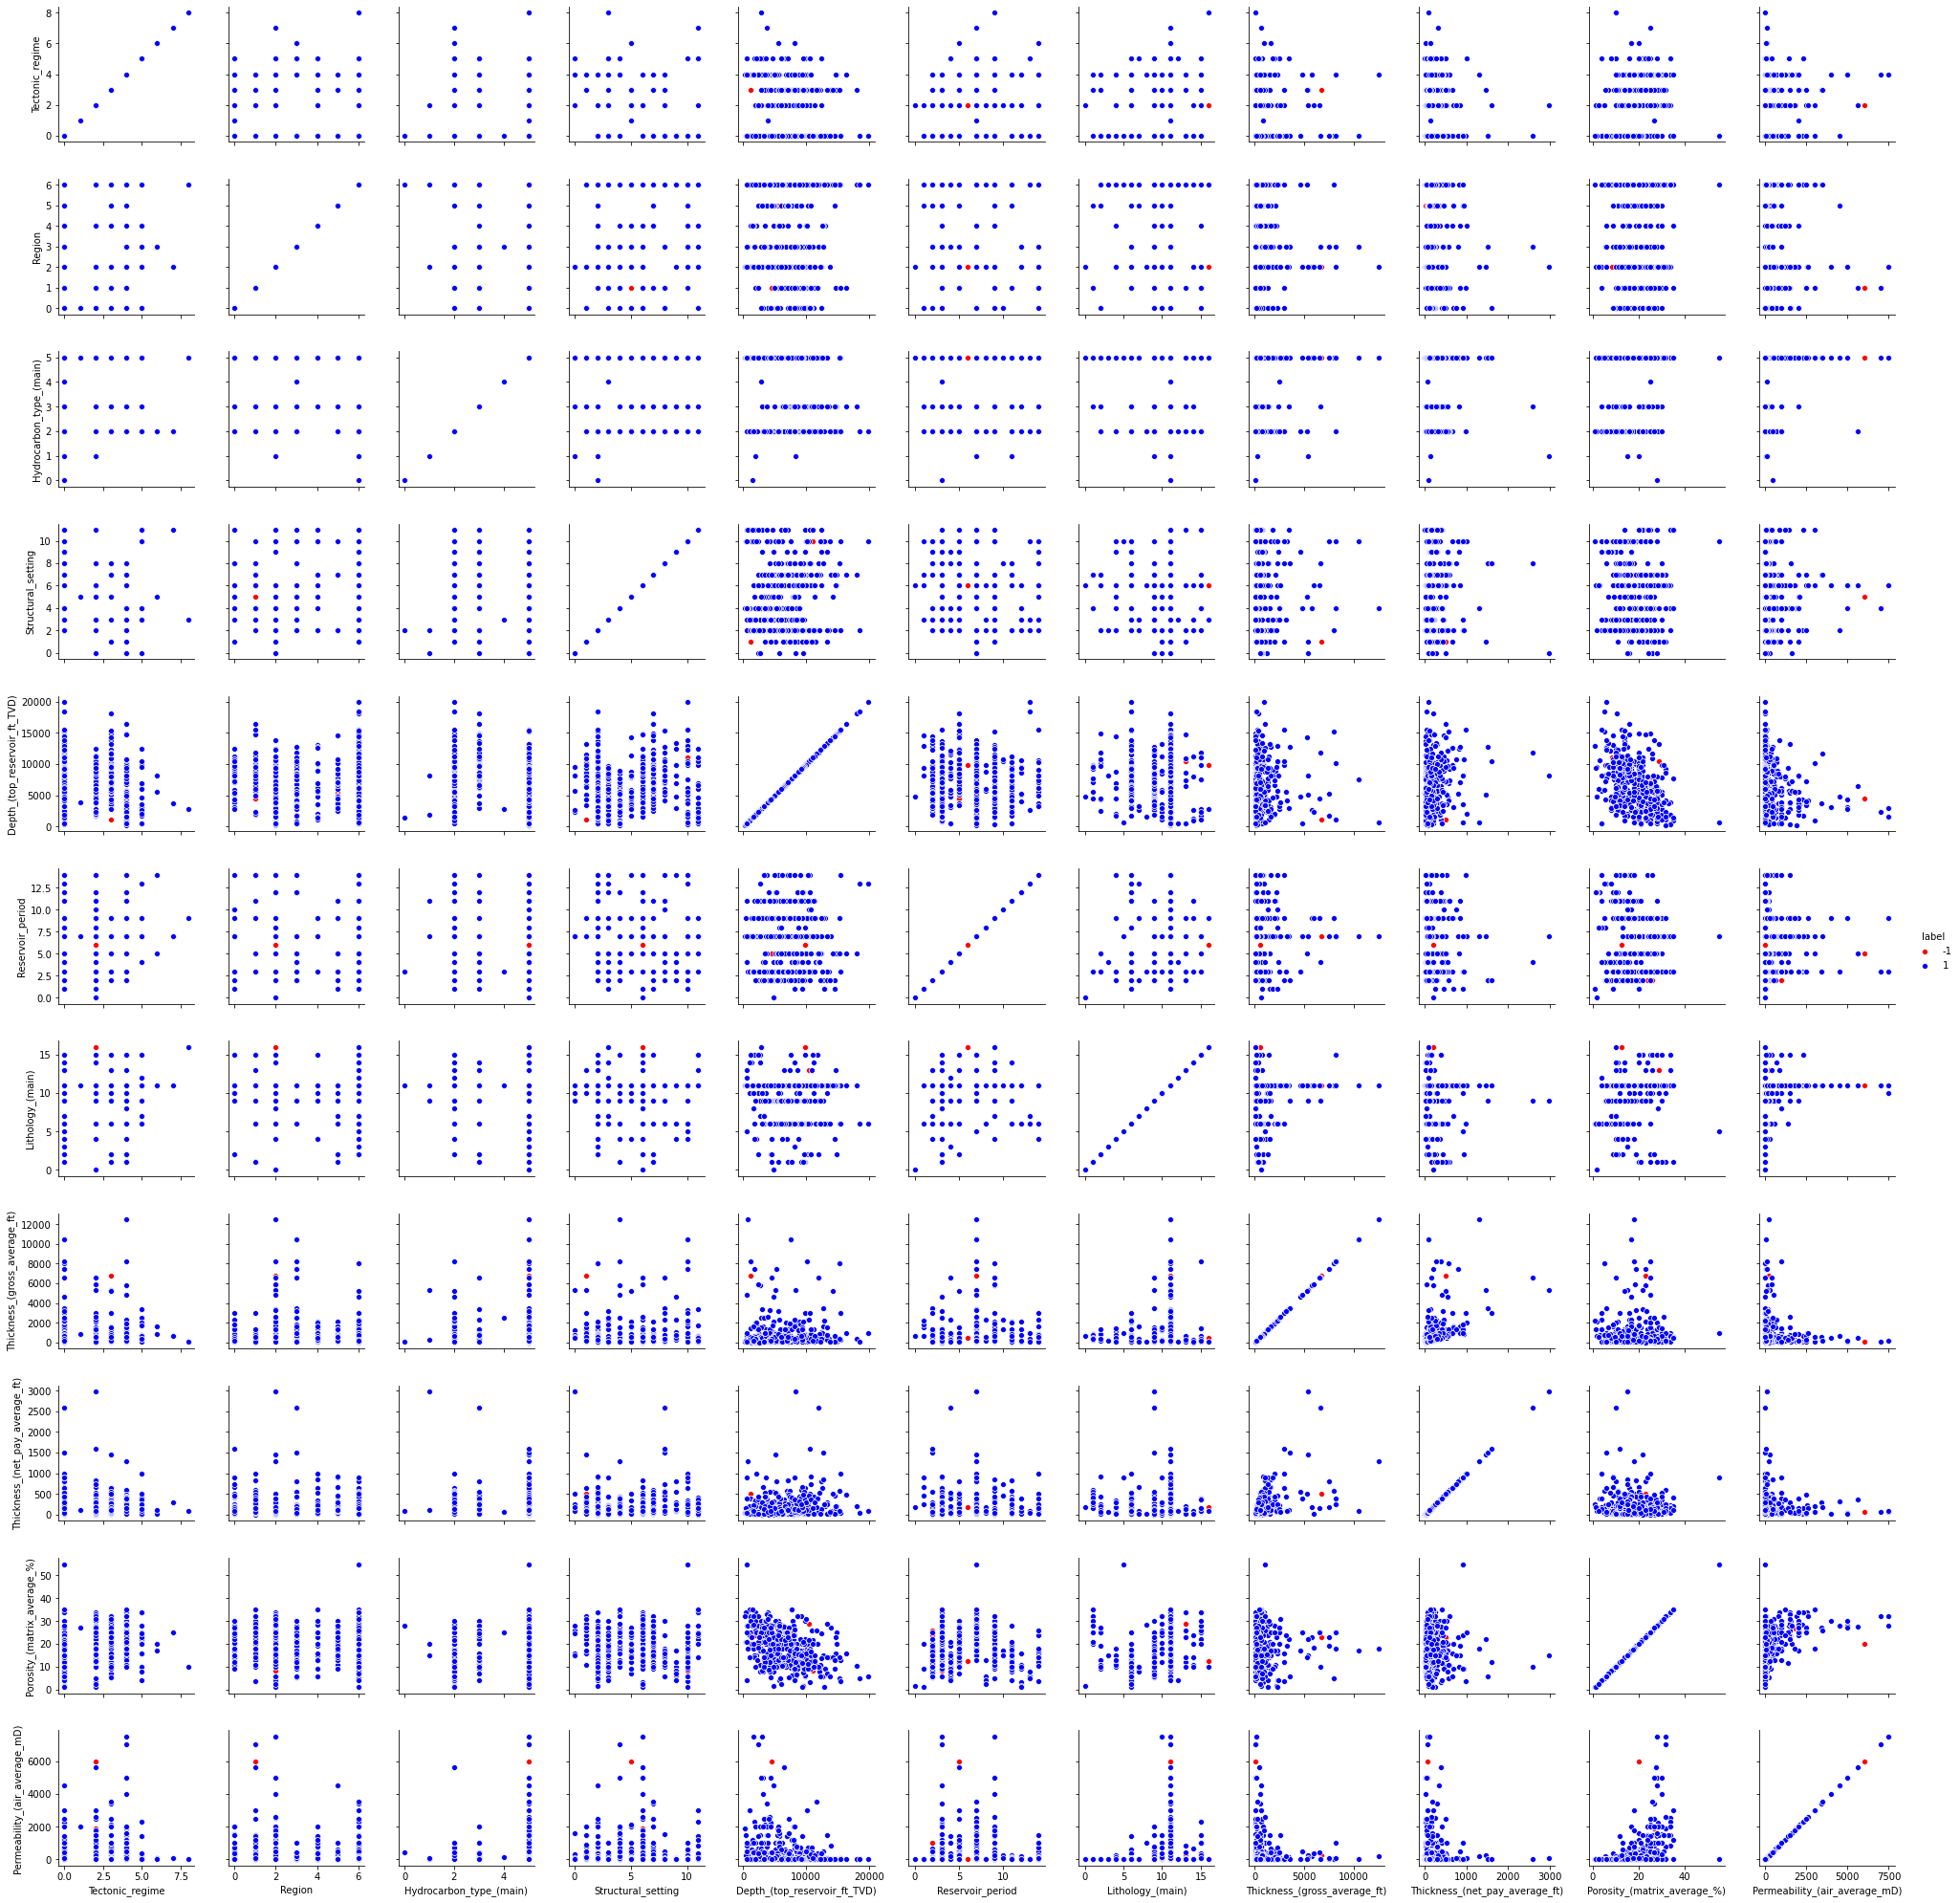

In [35]:
sns.pairplot(data_to_show, vars = df[need_cols], hue = 'label', palette={1: 'b', -1: 'r'}, diag_kind=None)

TODO:
    1. try to use Local Outlier Factor
    2. try to generate random noise data and check it with svm
    3. try to apply svm to generated samples from BN